## Use Selenium and Beautiful Soup to webscrape data


### Import selenium and chrome driver

In [71]:
# conda install selenium 
# download chromedriver: https://sites.google.com/a/chromium.org/chromedriver/downloads      

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import os
import numpy as np
from bs4 import BeautifulSoup
import re



In [177]:
#chromedriver = f"{os.environ['HOME']}/.local/bin/chromedriver" # path to the chromedriver executable
chromedriver = "/Users/hiranya/Downloads/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
#url for one house in king county
driver = webdriver.Chrome(chromedriver)
url='https://www.realtor.com/realestateandhomes-detail/1611-E-McGraw-St_Seattle_WA_98112_M12683-09686?ex=WA617364348&view=qv'
#url='https://www.realtor.com/realestateandhomes-detail/8911-2nd-Ave-NE_Seattle_WA_98115_M12569-23641?view=qv'
driver.get(url)


Scraping data from a single page using beautiful soup

In [59]:
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')


'<!DOCTYPE html>\n<html lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <style>\n   .smarty-dots { display: none; position: absolute; z-index: 999; width: 24px; height: 8px; background-image: url(\'\'); }.smarty-ui { position: absolute; z-index: 999; text-shadow: none; text-align: left; text-decoration: none; }.smarty-popup { border: 3px solid #4C4C4C; padding: 0; background: #F6F6F6; box-shadow: 0px 10px 35px rgba(0, 0, 0, .8); }.smarty-popup-header { background: #DDD; height: 12px; text-transform: uppercase; font: bold 12px/1em \'Arial Black\', sans-serif; padding: 12px; }.smarty-popup-ambiguous-header { color: #333; height: 20px; }.smarty-popup-invalid-header { color: #CC0000; }.smarty-popup-missing-input-header { color: #CC0000; height: 58px; }.smarty-popup-close { color: #CC0000 !important; text-decoration: none !important; position: absolute; right: 15px; top: 10px; display: block; padding: 4px 6px; text-transform: uppercase; }.smarty-popup-close:hover { color: #FFF !
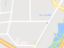
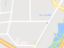

In [63]:
soup.prettify()

In [262]:
#initialize  an empty df
df=pd.DataFrame(columns=['Price','Beds','Baths','Price_per_sqft','Type','Yr_Built','Zipcode','City','Sqft_lot',\
                         'Sqft_liv','High_school_rating','Middle_school_rating','Elementary_School_Rating','Heating',\
                         'Cooling','Fireplace','View'])

In [73]:
soup.find_all('span')

[<span class="sr-only">Toggle navigation</span>,
 <span class="icon-bar"></span>,
 <span class="icon-bar"></span>,
 <span class="icon-bar"></span>,
 <span class="header-login-text js-username"></span>,
 <span class="header-login-icon"><i class="svg-icon svg-icon-user"></i></span>,
 <span class="myaccount-username"></span>,
 <span class="global-nav-font-semibold">Follow Search</span>,
 <span class="global-nav-font-semibold">Follow Search</span>,
 <span class="header-login-text login">Log In</span>,
 <span class="header-login-text signup">Sign Up</span>,
 <span class="header-login-icon signup"><i class="svg-icon svg-icon-user"></i></span>,
 <span class="header-login-text advertise">Advertise</span>,
 <span class="dropdown-toggle-mobile"><i class="svg-icon svg-icon-angle-down"></i></span>,
 <span class="dropdown-toggle-mobile"><i class="svg-icon svg-icon-angle-down"></i></span>,
 <span class="dropdown-toggle-mobile"><i class="svg-icon svg-icon-angle-down"></i></span>,
 <span class="dropdo

In [321]:
df.head()

,Price,Beds,Baths,Price_per_sqft,Type,Yr_Built,Zipcode,City,Sqft_lot,Sqft_liv,High_school_rating,Middle_school_rating,Elementary_School_Rating,Heating,Cooling,Fireplace,View,Yr_built
0,950000,4,1.5,377,Single Family Home,1928,98112,Seattle,4500,2520,7,7,8,Forced Air,Central A/C,Fireplace(s): Yes,None,1928.0


In [299]:
df.loc[0,'City'] =soup.find_all('span',itemprop='name')[2].text
    

In [300]:
df.loc[0,'Price']=int((soup.find('span',itemprop='price').text).strip().replace('$','').replace(',','').replace(',',''))

In [301]:
df.loc[0,'Zipcode']=soup.find_all('span',itemprop='postalCode')[0].text

Functions to extract all features from the link

In [390]:
def Sft_liv(soup):
    try:
        li=float(soup.find_all('li',{"data-label":'property-meta-sqft'})[0].find('span').\
                             text.replace(',',''))
        return li
    except:
        None

In [254]:
def Fireplace(soup):
    for tag in soup.find_all('ul',class_="list-default"):
         for it in tag.find_all('li'):
                if  it.text.startswith('Fireplace'):
                    return it.text       

In [319]:
def View(soup):
    for tag in soup.find_all('ul',class_="list-default"):
         for it in tag.find_all('li'):
                if  it.text.startswith('View:'):
                    return it.text                         
        
    

In [273]:
def Baths(soup):
    for tag in soup.find_all('ul',class_="list-default"):
         for it in tag.find_all('li'):
                if  it.text.startswith('Total bath'):
                    return float((it.text).split(':')[1])

In [279]:
def Heating(soup):
    for tag in soup.find_all('ul',class_="list-default"):
         for it in tag.find_all('li'):
                if  it.text.startswith('Heating fea'):
                    return it.text.split(':')[1]

In [282]:
def Cooling(soup):
    for tag in soup.find_all('ul',class_="list-default"):
         for it in tag.find_all('li'):
                if  it.text.startswith('Cooling fea'):
                    return it.text.split(':')[1]

In [381]:
def sqft_lot(soup):
    try:
        lot=float(soup.find_all('li',{"data-label":'property-meta-lotsize'})[0].find('span').text.replace(',',''))
        return lot
    except:
        None
    
    

In [367]:
def Built(soup):
    try:
        built=int(soup.find_all('div',{'class':"key-fact-data ellipsis"}) [4].text)
        return built
    except:
        None

In [368]:
def Elementary(soup):
    try:
        elem=soup.find_all('span',class_="school-rating")[0].text
        return elem
    except:
        None

In [369]:
def High(soup):
    try:
        Hi=soup.find_all('span',class_="school-rating")[2].text
        return Hi
    except:
        None

In [370]:
def Middle(soup):
    try:
        mi=soup.find_all('span',class_="school-rating")[1].text
        return mi
    except:
        None

In [386]:
def Price_sft(soup):
    try:
        pi=int(soup.find_all('div',{'class':"key-fact-data ellipsis"}) [1].text.\
                                        replace('$','').replace(',',''))
        return pi
    except:
        None

In [393]:
def Beds(soup):
    try:
        be=float(soup.find_all('li',{"data-label":'property-meta-beds'})[0].find('span').string)
        return be
    except:
        None

In [396]:
def Type(soup):
    try:
        te=soup.find_all('div',{'class':"key-fact-data ellipsis"}) [3].text
        return te
    except:
        None

In [401]:
def Price(soup):
    try:
        pe=int((soup.find('span',itemprop='price').text).strip().replace('$','').replace(',','').\
                               replace(',',''))
        return pe
    except:
        None

In [302]:
df.loc[0,'Elementary_School_Rating']=soup.find_all('span',class_="school-rating")[0].text

In [303]:
df.loc[0,'Middle_school_rating']=soup.find_all('span',class_="school-rating")[1].text

In [304]:
df.loc[0,'High_school_rating']=soup.find_all('span',class_="school-rating")[2].text

In [305]:
df.loc[0,'Cooling']=Cooling(soup)

In [306]:
df.loc[0,'Heating']=Heating(soup)

In [307]:
df.loc[0,'Price_per_sqft']=int(soup.find_all('div',{'class':"key-fact-data ellipsis"}) [1].text.replace('$',''))

In [317]:
df.loc[0,'Yr_Built']=int(soup.find_all('div',{'class':"key-fact-data ellipsis"}) [4].text)

In [309]:
df.loc[0,'Type']=soup.find_all('div',{'class':"key-fact-data ellipsis"}) [3].text

In [310]:
df.loc[0,'Baths']=Baths(soup)

In [320]:
df.loc[0,'View']=View(soup)

In [311]:
df.loc[0,'Fireplace']=Fireplace(soup)

In [313]:
df.loc[0,'Sqft_lot']=float(soup.find_all('li',{"data-label":'property-meta-lotsize'})[0].find('span').text.replace(',',''))

In [314]:
df.loc[0,'Sqft_liv']=int(soup.find_all('li',{"data-label":'property-meta-sqft'})[0].find('span').text.replace(',',''))

In [315]:
df.loc[0,'Beds']=int(soup.find_all('li',{"data-label":'property-meta-beds'})[0].find('span').string)

In [323]:
df.columns

Index(['Price', 'Beds', 'Baths', 'Price_per_sqft', 'Type', 'Yr_Built',
       'Zipcode', 'City', 'Sqft_lot', 'Sqft_liv', 'High_school_rating',
       'Middle_school_rating', 'Elementary_School_Rating', 'Heating',
       'Cooling', 'Fireplace', 'View', 'Yr_built'],
      dtype='object')

In [326]:
df.loc[0,df.columns[0]]

950000

Function to extract features from  a single page

In [402]:
def bs_scraper(url,sc_df,ind):
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    soup.prettify()
    
        
    sc_df.loc[ind,'Price']=Price(soup)
    sc_df.loc[ind,'City'] =soup.find_all('span',itemprop='name')[2].text
    sc_df.loc[ind,'Zipcode']=soup.find_all('span',itemprop='postalCode')[0].text
    sc_df.loc[ind,'Price_per_sqft']=Price_sft(soup)
    sc_df.loc[ind,'Yr_Built']=Built(soup)
    sc_df.loc[ind,'Type']=Type(soup)
    sc_df.loc[ind,'Baths']=Baths(soup)
    sc_df.loc[ind,'View']=View(soup)
    sc_df.loc[ind,'Fireplace']=Fireplace(soup)
    sc_df.loc[ind,'Sqft_lot']=sqft_lot(soup)
    sc_df.loc[ind,'Sqft_liv']=Sft_liv(soup)
    sc_df.loc[ind,'Beds']=Beds(soup)
    sc_df.loc[ind,'Elementary_School_Rating']=Elementary(soup)
    sc_df.loc[ind,'Middle_school_rating']=Middle(soup)
    sc_df.loc[ind,'High_school_rating']=High(soup)
    sc_df.loc[ind,'Cooling']=Cooling(soup)
    sc_df.loc[ind,'Heating']=Heating(soup)
    driver.close()
    return sc_df
    
    
    
    

In [372]:
#link for the 1st page in king county
df_new=bs_scraper('https://www.realtor.com/realestateandhomes-detail/1700-12th-Ave-S-Apt-107_Seattle_WA_98144_M25432-03655')

In [373]:
df_new

,Price,Beds,Baths,Price_per_sqft,Type,Yr_Built,Zipcode,City,Sqft_lot,Sqft_liv,High_school_rating,Middle_school_rating,Elementary_School_Rating,Heating,Cooling,Fireplace,View
0,415000,2,1.75,338,Condo/Townhome/Row Home/Co-Op,1992,98144,Seattle,None,1228,6,7,6,"Electric heat,Forced air heat",None,None,None


In [343]:
# read data from links file containing urls of all listings
df_l=pd.read_csv("links_final.csv")

In [344]:
df_li=df_l.drop(columns=['Unnamed: 0'])

In [354]:
df_li.links[0]

'https://www.realtor.com/realestateandhomes-detail/1700-12th-Ave-S-Apt-107_Seattle_WA_98144_M25432-03655'

Navigate though links by scraping in chunks of 200 links at a time and save all features from the liink into a csv file 

In [410]:
i=1401
while i<1551:
    url=df_li.links[i]
    
    if i==1401:
        #initialize  an empty df
        sc_df=pd.DataFrame(columns=['Price','Beds','Baths','Price_per_sqft','Type','Yr_Built','Zipcode','City','Sqft_lot',\
                         'Sqft_liv','High_school_rating','Middle_school_rating','Elementary_School_Rating','Heating',\
                         'Cooling','Fireplace','View'])
        sc_df=bs_scraper(url,sc_df,i)
        
        sc_df.to_csv('data13.csv',index=False)
    else:
        print('Scrapping Page',i)
        sc_df=bs_scraper(url,sc_df,i)
        sc_df.append(sc_df, ignore_index=True)
        print(len(sc_df))
        #append every 10 rows to file
        if i%50==0:
            with open('data13.csv', 'a') as f:
                sc_df.to_csv(f, header=False, index=False)
    
    i=i+1
    

Scrapping Page 1402
2
Scrapping Page 1403
3
Scrapping Page 1404
4
Scrapping Page 1405
5
Scrapping Page 1406
6
Scrapping Page 1407
7
Scrapping Page 1408
8
Scrapping Page 1409
9
Scrapping Page 1410
10
Scrapping Page 1411
11
Scrapping Page 1412
12
Scrapping Page 1413
13
Scrapping Page 1414
14
Scrapping Page 1415
15
Scrapping Page 1416
16
Scrapping Page 1417
17
Scrapping Page 1418
18
Scrapping Page 1419
19
Scrapping Page 1420
20
Scrapping Page 1421
21
Scrapping Page 1422
22
Scrapping Page 1423
23
Scrapping Page 1424
24
Scrapping Page 1425
25
Scrapping Page 1426
26
Scrapping Page 1427
27
Scrapping Page 1428
28
Scrapping Page 1429
29
Scrapping Page 1430
30
Scrapping Page 1431
31
Scrapping Page 1432
32
Scrapping Page 1433
33
Scrapping Page 1434
34
Scrapping Page 1435
35
Scrapping Page 1436
36
Scrapping Page 1437
37
Scrapping Page 1438
38
Scrapping Page 1439
39
Scrapping Page 1440
40
Scrapping Page 1441
41
Scrapping Page 1442
42
Scrapping Page 1443
43
Scrapping Page 1444
44
Scrapping Page 1445

In [127]:
[item["data-label"] for item in soup.find_all('li') if "data-label" in item.attrs]


['property-meta-beds',
 'property-meta-baths',
 'property-meta-sqft',
 'property-meta-lotsize',
 'property-sqft',
 'property-listing-agent',
 'property-type',
 'property-year',
 'additional-office-link',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'property-meta-sqft',
 'compact-meta-beds',
 'compact-meta-baths',
 'p

## Get links of all listings per page  in realtor.com using selenium

In [6]:
def get_url(page):
    if page == 1:
        return 'https://www.realtor.com/realestateandhomes-search/King-County_WA/type-single-family-home,condo-townhome-row-home-co-op'
    return f'https://www.realtor.com/realestateandhomes-search/King-County_WA/type-single-family-home,condo-townhome-row-home-co-op/pg-{page}'

In [27]:
links=[]
for d in driver.find_elements_by_xpath('//a[contains(@href, "/realestateandhomes-detail/")]'):
     links.append(d.get_attribute('href'))

In [42]:
list(set(links))

['https://www.realtor.com/realestateandhomes-detail/1700-12th-Ave-S-Apt-107_Seattle_WA_98144_M25432-03655',
 'https://www.realtor.com/realestateandhomes-detail/7902-Douglas-Ave-SE_Snoqualmie_WA_98065_M29263-42667',
 'https://www.realtor.com/realestateandhomes-detail/338-NE-52nd-St_Seattle_WA_98105_M29771-17957',
 'https://www.realtor.com/realestateandhomes-detail/4628-193rd-Ave-SE_Issaquah_WA_98027_M25002-31468?ex=WA617351648',
 'https://www.realtor.com/realestateandhomes-detail/Building-Twenty-Two-Floorplan-Q1_Upton-at-Crossroads-Village_1495-158th-PL-NE_Bellevue_WA_98008_P412259842226',
 'https://www.realtor.com/realestateandhomes-detail/Building-Five-Floorplan-L2_Upton-at-Crossroads-Village_1495-158th-PL-NE_Bellevue_WA_98008_P412560310831',
 'https://www.realtor.com/realestateandhomes-detail/2814-42nd-Ave-W_Seattle_WA_98199_M17268-91443',
 'https://www.realtor.com/realestateandhomes-detail/1559-8th-St-NE-A_Auburn_WA_98002_M28642-08203',
 'https://www.realtor.com/realestateandhomes-d

In [29]:
def get_a_tags(url):
    links=[]
    for d in driver.find_elements_by_xpath('//a[contains(@href, "/realestateandhomes-detail/")]'):
        links.append(d.get_attribute('href'))
    return links

In [43]:
page = 1

list_of_atags = []
while page < 100:
    url = get_url(page)
    try:
        driver = webdriver.Chrome(chromedriver)
        driver.get(url)
    except:
        # out of pages!
        break
    time.sleep(3)
    #list_of_tables.append(pd.read_html(driver.page_source)[5])
    list_atag=get_a_tags(url)
    list_of_atags.extend(list(set(list_atag)))
    
      
    page = page + 1
    driver.close()



In [44]:
len(list_of_atags)

4681

In [45]:
import pandas as pd

In [48]:
df_link=pd.DataFrame(data={'links':list_of_atags})
df_link.tail()

,links
4676,https://www.realtor.com/realestateandhomes-det...
4677,https://www.realtor.com/realestateandhomes-det...
4678,https://www.realtor.com/realestateandhomes-det...
4679,https://www.realtor.com/realestateandhomes-det...
4680,https://www.realtor.com/realestateandhomes-det...


In [385]:
df_link.loc[100,'links']

'https://www.realtor.com/realestateandhomes-detail/11817-NE-162nd-Ct_Bothell_WA_98011_M25729-39187'

In [47]:
#save all the links to csv file
df_link.to_csv("links_final.csv")